# Домашнее задание. Исследование численных методов решения нелинейных краевых задач. Задача 7
#### Работу выполнила Кондрашина Анна, 7111 группа

### Постановка задачи

Рассмотрим две краевые задачи: 

$$(1):  y'' = e^y,  y(0)  = a, y(1) = b; $$

$$(2):  y'' = e^{-y}, y(0) = a, y(1) = b;$$


### Методы решения: 
#### 1) Попытаемся решить задачу аналитически 
Решение будем искать для а = 1. Для этого сделаем замену: $ y'_x = p$. Тогда наши уравнения второго порядка можно представить как систему уравнений: 
$$ \begin{equation}
 \begin{cases}
   y' = p\\
   p' = \frac{e^y}{p}\\
   y(0) = 1\\
   y(1) = b\\
 \end{cases}
\end{equation}
$$
Вторая система примет вид: 

$$ \begin{equation}
 \begin{cases}
   y' = p\\
   p' = \frac{e^{-y}}{p}\\
   y(0) = 1\\
   y(1) = b\\
 \end{cases}
\end{equation}
$$


Решая далее эти системы, получим общие решения для систем. Для первой: 
$$ y_1 = \log({\frac{1}{2}\cdot c_1 \cdot (\tanh^2{\frac{1}{2}\sqrt{c_1\cdot(c_2+x)^2}}-1))}$$

И для второй: 
$$ y_2 = \log(\frac{e^{-\sqrt{c_1}(c_2+x)}(2c_1\cdot e^{\sqrt{c_1}(c_2+x)}+1)^2}{4\cdot c_1^2})$$

Чтобы подучить точное решение, нужно подставить начальные условия и решить полученные трансцендентные уравнения. Это не представляется возможным, поэтому постараемся решить задачу численно 

#### 2) Методом стрельбы

Метод стрельбы ( его иногда называют балистическим) заключается в сведении решения краевой задачи к последоввательному решению несеольких задач Коши, с особым образом сформулированными начальными условиями. 

Кратко опишем алгоритм этого метода. Пусть есть краевая задача вида:

$$ \begin{equation}
 \begin{cases}
   y'' = f(x, y, y'), x \in [\alpha, \beta] \\
   y(\alpha) = a\\
   y(\beta) = b\\
 \end{cases}
\end{equation}
$$
"Прицелимся", т. е. зададим параметр $t_0$ и решим задачу Коши вида:

$$ \begin{equation}
 \begin{cases}
   y'' = f(x, y, y'), x \in [\alpha, \beta] \\
   y(\alpha) = a\\
   y'(\alpha) = t_0\\
 \end{cases}
\end{equation}
$$
Очевидно, что $y(\beta, t_0)\neq b$, и для того, чтобы решить задачу Коши, остается решить трансциндентное уравнение:
$$ y(x,t) = b$$
Для этого будем использовать, метод Ньютона. Тогда каждое следующее приближение для пристрелочного параметра будет вычисляться по формуле: 
$$ t_{k+1} = t_k - \frac{y(b; t_k) - b}{\frac{d}{dt}y(b,t_k)}$$

Чтобы найти $\frac{d}{dt}y(b,t_k)$ нужно решить еще одну задачу Коши. То есть решение краевой задачи сводится к последовательному решению нескольких задач Коши. 

Решив поставленную задачу методом стрельбы при различных значениях функции на кправом конце( b), получим следующие графики. Для первого уравнения: 


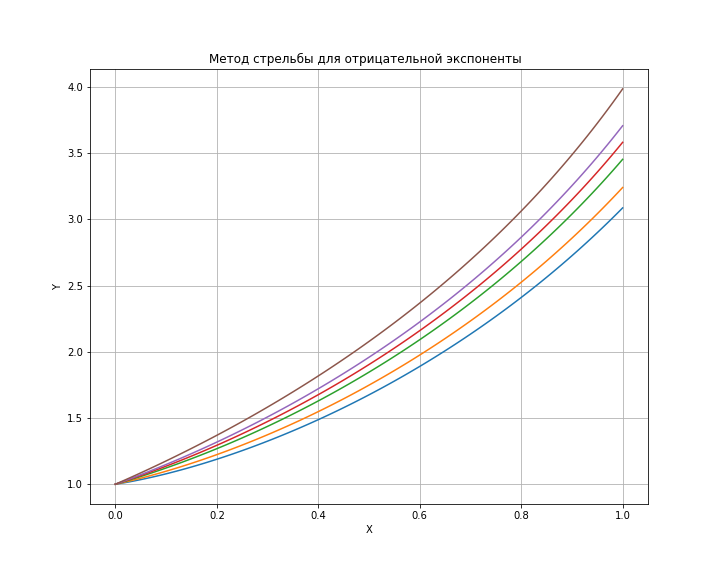

In [7]:
Image.open("shooting.png")

Также построим график зависимости производной функции от функции. Для задачи (1) она будет выглядеть: 

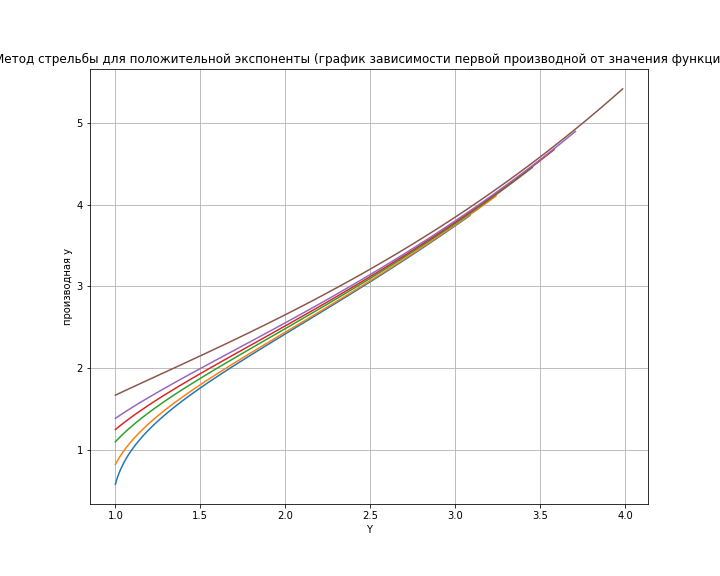

In [8]:
Image.open("shootingproiz.png")

Для задачи (2): 

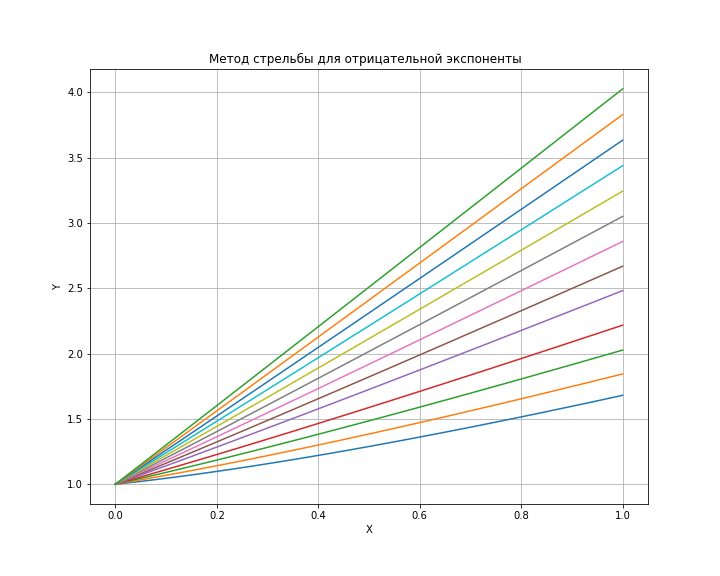

In [5]:
Image.open("Minshooting.png")

Также построим график зависимости производной функции от функции. Для задачи (2) она будет выглядеть: 

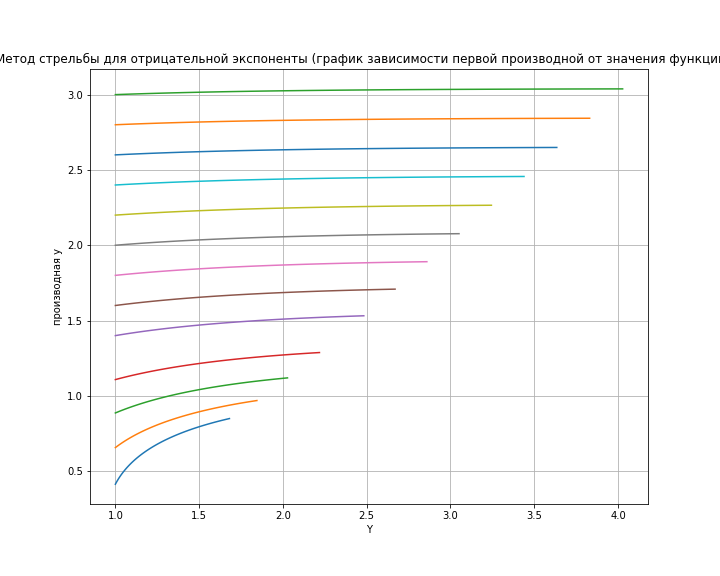

In [9]:
Image.open("Minshootingproiz.png")

        К сожалению, не получилось построить решение задачи (1) для 0<b<3 и задачи (2) для 0<b<1.5 никаким из предложенных методов. при этом использовалось два подхода подбора пристрелочного параметра: методом Ньютона, и методом дления отрезка пополам, но ни один из этих подходов не справился с задачей.  Скорее всего, эта проблема связана с тем, что решение поставленных задач не будет непрерывным по параметру( краевые условия тоже можно считать параметром)

#### 3) Метод Нумерова с линеаризацией по Ньютону
Построим решение методом Нумерова. Используем формулу: 
$$y_{n+1} - 2 y_n+y_{n-1} = \frac{h^2}{12} (f_{n-1}+10\cdot f_{n}+f_{n+1})$$
Построим полученные решения:

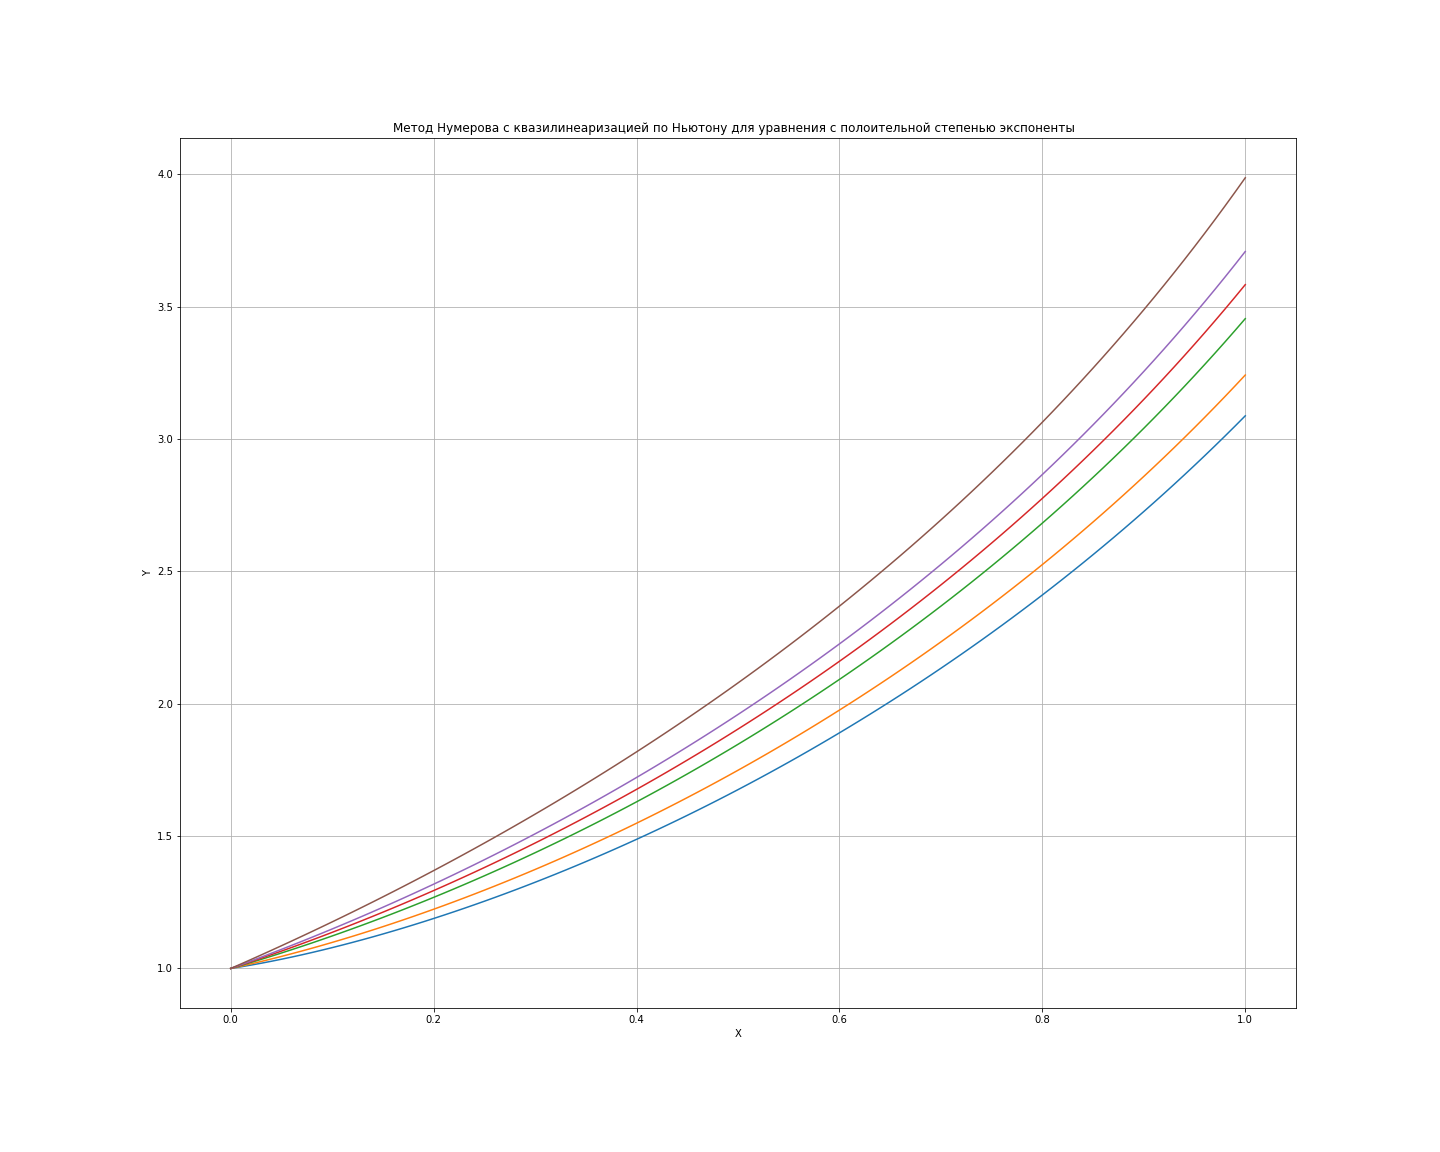

In [11]:
Image.open("linear.png")

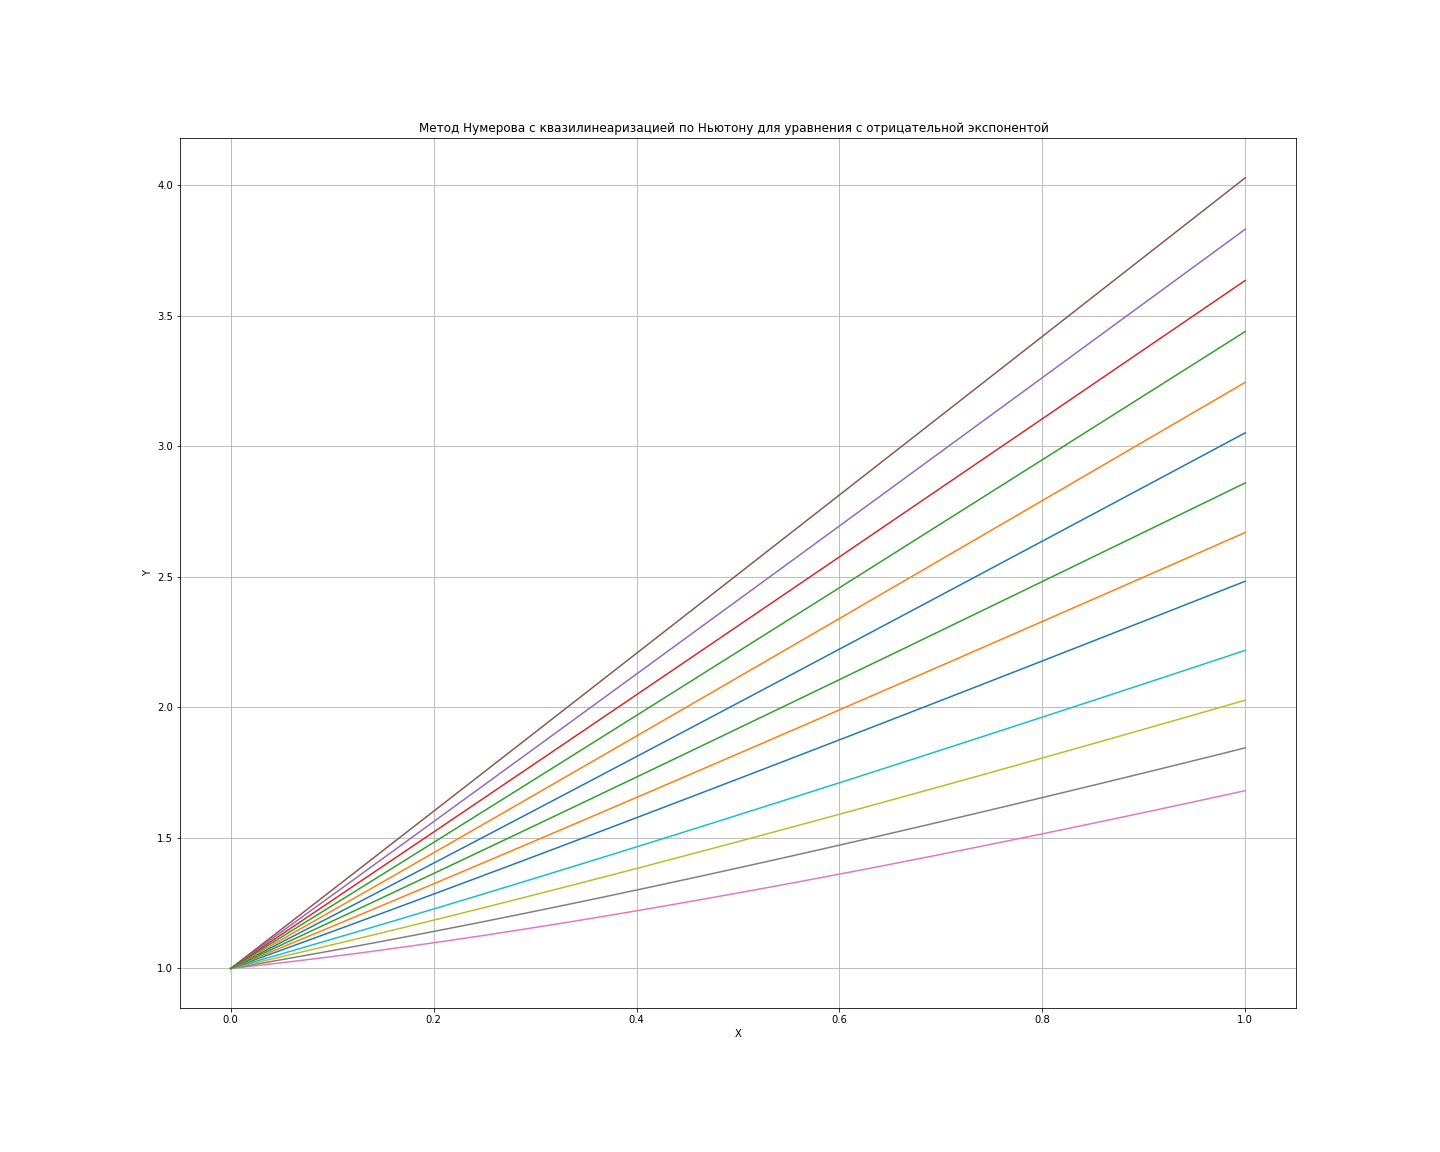

In [13]:
Image.open("Minuslinear.png")

Метод нумерова является методом четвертого порядка апроксимации, то есть для получения точности $\epsilon = 10^{-4}$, достаточно взять шаг $\tau = 0.1$

### Обсуждение результатов 
1) Аналитически удалось получить общий вид решения поставленных задач

2) Методом стрельбы получилось найти решение задачи (1) с краевыми условиями а = 1 и b>3,и задачи (2) с краевыми условиями а = 1, b>1.5. Такие ограничения связаны с сильной нелинейностью правой части, и, возможно, с тем, что функция правой части не является непрерывной по параметру

3) Численное решение методом Нумерова с квазилинеаризацией по Ньютону является более точным, так как имеет четвертый порядок апроксимации, а значит для получения точности более $\epsilon = 10^{-4}$ необходимо брать более 10 узлов сетки на заданном отрезке [0,1]